In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv('BitcoinHeistData.csv',index_col='label')

In [4]:
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [5]:
print(df)

                                            address  year  day  length  \
label                                                                    
princetonCerber   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18   
princetonLocky   1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44   
princetonCerber  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0   
princetonCerber  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72   
princetonLocky   1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144   
...                                             ...   ...  ...     ...   
white            12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry  2018  330       0   
white            1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2  2018  330       0   
white            1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw  2018  330       2   
white            15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a  2018  330       0   
white            3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e  2018  330     144   

                    weight  count  lo

In [6]:
whiteTrans = df.loc['white']
print(whiteTrans)

                                  address  year  day  length     weight  \
label                                                                     
white  19snqSYnDSC4mDbv3pJuYgYqm5ctqwAxnm  2011    1       0   1.000000   
white  1FeGY25MSKtnwVNGrnbwLsecBpBYrMQ6Kx  2011    1       0   1.000000   
white  1A1nkBK7tfnVRtVbyiirEWRcayQtSTBCsW  2011    1       0   1.000000   
white  18wHa1PLzoU4ToemBZn2czZbVEbyZJ2gSi  2011    1       0   1.000000   
white  188sYyuK756uEsq5LTk9tiXyJHeEjxKT5c  2011    1       0   1.000000   
...                                   ...   ...  ...     ...        ...   
white  12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry  2018  330       0   0.111111   
white  1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2  2018  330       0   1.000000   
white  1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw  2018  330       2  12.000000   
white  15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a  2018  330       0   0.500000   
white  3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e  2018  330     144   0.073972   

       count  looped  ne

In [7]:
print('Percent White Transactions: ' + str(whiteTrans.shape[0]/df.shape[0]))

Percent White Transactions: 0.9858014048082472


In [8]:
dirtyTrans = df.drop('white', axis = 0)
df.drop('white', axis = 0)

,address,year,day,length,weight,count,looped,neighbors,income
label,,,,,,,,,
princetonCerber,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08
princetonLocky,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08
princetonCerber,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08
princetonCerber,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07
princetonLocky,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08
...,...,...,...,...,...,...,...,...,...
montrealAPT,35iCvpMMnUWcSWrYtLJLXqe9xo5CYEWRhw,2017,76,144,1.375002,8076,8073,6,5.726876e+08
montrealAPT,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,259,2,1.500000,2,0,2,7.449526e+07
montrealAPT,377CY1m8W2qbQQX5HHjziimdh2faGjDeLv,2016,277,0,0.500000,1,0,2,5.714286e+07


In [9]:
dirtyTrans.describe()

,year,day,length,weight,count,looped,neighbors,income
count,41413.000000,41413.000000,41413.000000,4.141300e+04,41413.000000,41413.000000,41413.000000,4.141300e+04
mean,2014.876923,174.439741,41.636926,6.274532e-01,599.810277,95.100645,2.076256,7.833721e+08
std,1.361243,94.700239,58.442350,2.667625e+00,1419.955449,525.423306,2.401167,1.423362e+10
min,2011.000000,1.000000,0.000000,4.719723e-42,1.000000,0.000000,1.000000,3.000000e+07
25%,2014.000000,90.000000,0.000000,6.250000e-02,1.000000,0.000000,1.000000,8.000000e+07
50%,2015.000000,160.000000,6.000000,3.880441e-01,1.000000,0.000000,2.000000,1.250000e+08
75%,2016.000000,260.000000,80.000000,1.000000e+00,15.000000,0.000000,2.000000,3.000000e+08
max,2018.000000,365.000000,144.000000,4.982885e+02,13462.000000,11693.000000,94.000000,2.595000e+12


In [10]:
whiteTrans.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.875284e+06,2.875284e+06,2.875284e+06,2.875284e+06,2.875284e+06,2.875284e+06,2.875284e+06,2.875284e+06
mean,2.014469e+03,1.815583e+02,4.505716e+01,5.443391e-01,7.233994e+02,2.405722e+02,2.208392e+00,4.517914e+09
std,2.267199e+00,1.041364e+02,5.898871e+01,3.686734e+00,1.693183e+03,9.710563e+02,1.804504e+01,1.638439e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.012000e+03,9.200000e+01,2.000000e+00,2.111024e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.404454e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.750000e-01,5.700000e+01,0.000000e+00,2.000000e+00,1.000000e+09
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


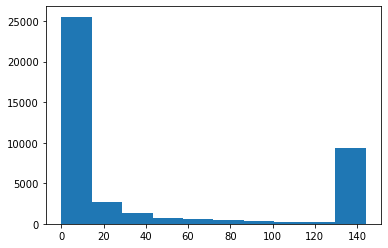

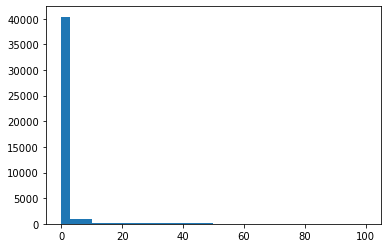

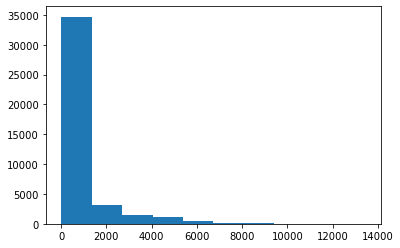

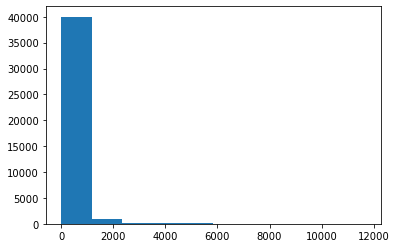

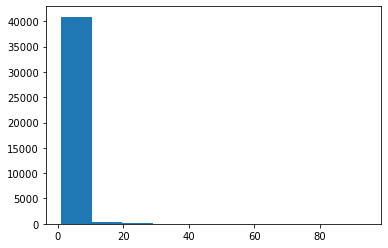

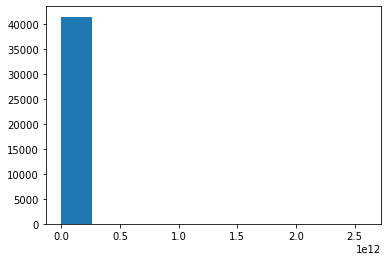

In [19]:
plt.hist(dirtyTrans.loc[:,'length'])
plt.show()
plt.hist(dirtyTrans.loc[:,'weight'],[0, 3, 10, 50, 100])
plt.show()
plt.hist(dirtyTrans.loc[:,'count'])
plt.show()
plt.hist(dirtyTrans.loc[:,'looped'])
plt.show()
plt.hist(dirtyTrans.loc[:,'neighbors'])
plt.show()
plt.hist(dirtyTrans.loc[:,'income'])
plt.show()

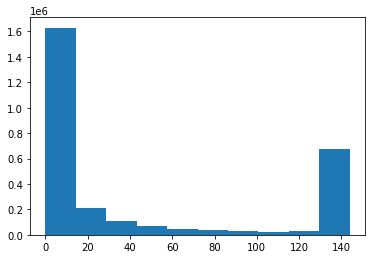

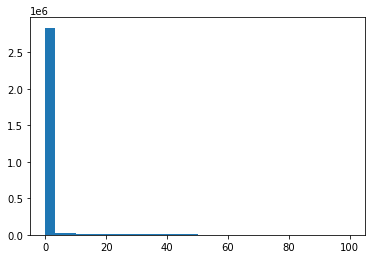

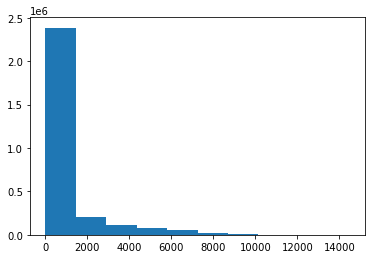

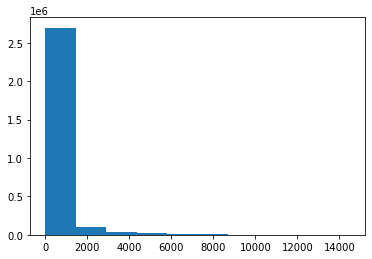

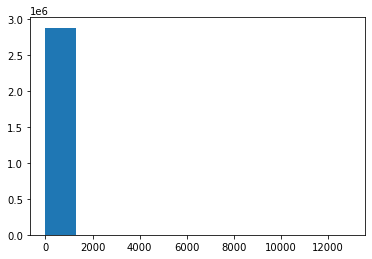

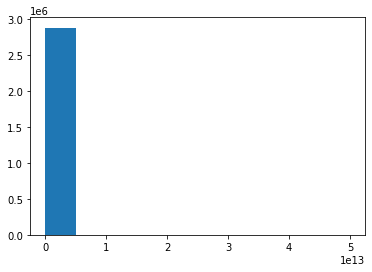

In [20]:
plt.hist(whiteTrans.loc[:,'length'])
plt.show()
plt.hist(whiteTrans.loc[:,'weight'],[0, 3, 10, 50, 100])
plt.show()
plt.hist(whiteTrans.loc[:,'count'])
plt.show()
plt.hist(whiteTrans.loc[:,'looped'])
plt.show()
plt.hist(whiteTrans.loc[:,'neighbors'])
plt.show()
plt.hist(whiteTrans.loc[:,'income'])
plt.show()

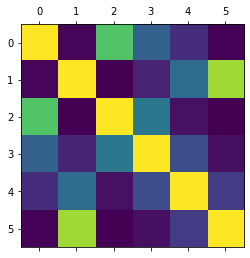

In [21]:
dirtyTemp = dirtyTrans.iloc[:,3:]
plt.matshow(dirtyTemp.corr())
plt.show()

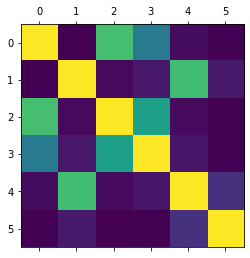

In [22]:
whiteTemp = whiteTrans.iloc[:,3:]
plt.matshow(whiteTemp.corr())
plt.show()

In [24]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dirtyTemp)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_



In [27]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(dirtyTemp, labels))

# #############################################################################


Estimated number of clusters: 239
Silhouette Coefficient: -0.642


In [43]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = dirtyTemp[class_member_mask & core_samples_mask]
    print(xy)
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = dirtyTemp[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

                      length  weight  count  looped  neighbors       income
label                                                                      
princetonCerber            0     1.0      1       0          2  200000000.0
montrealCryptoLocker       0     1.0      1       0          2  200000000.0
montrealCryptoLocker       0     1.0      1       0          2  200000000.0
princetonCerber            0     1.0      1       0          2  200000000.0
princetonCerber            0     1.0      1       0          2  200000000.0
...                      ...     ...    ...     ...        ...          ...
princetonCerber            0     1.0      1       0          2  200000000.0
princetonCerber            0     1.0      1       0          2  200000000.0
paduaCryptoWall            0     1.0      1       0          2  200000000.0
paduaCryptoWall            0     1.0      1       0          2  200000000.0
princetonCerber            0     1.0      1       0          2  200000000.0

[94 rows x 

TypeError: '(slice(None, None, None), 0)' is an invalid key

[0.36637665 0.30873889 0.15202702 0.11116542 0.041579   0.02011303]
[301.72261649 276.97440461 194.35886606 166.19916166 101.64382268
  70.69402414]


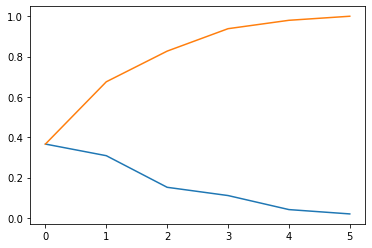

In [42]:
dirtyStd = StandardScaler().fit_transform(dirtyTemp)
pca = PCA(n_components=6)
pca.fit(dirtyStd)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

[0.35676674 0.28546505 0.16226005 0.10047181 0.05064837 0.04438799]
[2480.89382143 2219.17969085 1673.09962975 1316.55227777  934.75700114
  875.08195285]


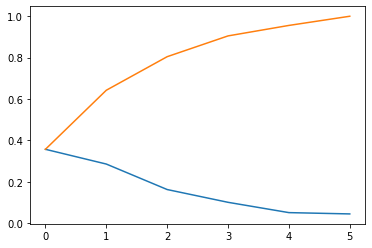

In [41]:
whiteStd = StandardScaler().fit_transform(whiteTemp)
pca.fit(whiteStd)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

[[-5.57373391e-01 -3.39297793e-02 -4.20693278e-01 -1.80751532e-01
  -1.27272382e-01 -1.89016872e-02]
 [ 1.65274503e+00 -5.61963134e-02  4.76604635e-01 -1.19346666e-01
  -8.79018158e-02 -1.16281562e-02]
 [ 1.75154336e+00  1.86558126e+02  1.80584587e+00  4.76174074e+00
   2.57893296e+01  1.82261972e+02]
 [ 1.74665000e+00  2.56496888e-01  1.25074759e+00  3.18760445e+00
   5.36639956e-01  1.12899976e-01]
 [ 1.23624399e+00  3.55823890e+00  9.03718282e-01  3.22632089e+00
   1.33096158e+01  1.35329841e+00]
 [ 8.00856022e-01  1.18305083e+00  1.53158506e-01  6.64867976e-01
   4.07759035e+00  4.36105687e-01]
 [ 1.74839046e+00 -1.20978492e-01  2.93145856e+00 -1.44432355e-01
  -1.78042169e-01 -3.86191213e-02]
 [ 1.74919222e+00  1.11540576e-01  3.89051875e+00  9.09154804e+00
   3.43381784e-01  1.01687196e-02]]


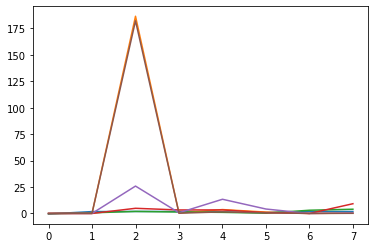

In [50]:
kmeans = KMeans()
kmeans.fit(dirtyStd)
print(kmeans.cluster_centers_)
plt.plot(kmeans.cluster_centers_)

[[-5.77465038e-01 -5.51209975e-03 -4.24147193e-01 -2.47107550e-01
  -2.19990359e-02 -3.62366559e-03]
 [ 1.64845910e+00 -4.75778389e-02  2.85179859e+00 -1.93001002e-01
  -2.05237051e-02 -1.95950285e-02]
 [ 1.33371447e+00  2.34864220e+01  9.30264938e-01  2.09275853e+00
   3.03179324e+01  3.71914024e+00]
 [ 1.57261038e+00 -4.81036317e-02  3.79358408e-01  2.40321146e-01
   9.60022156e-03 -1.90673410e-03]
 [ 1.67223127e+00  1.46155256e-01  2.69475405e+00  4.67049222e+00
   1.00140180e-01 -5.85830904e-03]
 [ 1.67731873e+00  5.09630201e+02  2.41297098e+00  4.70459724e+00
   5.95701685e+02  4.12419641e+01]
 [ 1.08398471e+00  2.16720605e+02  2.97408144e+00  5.68207682e+00
   5.49135294e+01  5.28517204e+00]
 [-2.65426369e-01  1.83273392e+00 -2.25196873e-01  3.45614874e-02
   9.96164683e+00  2.68938625e+02]]


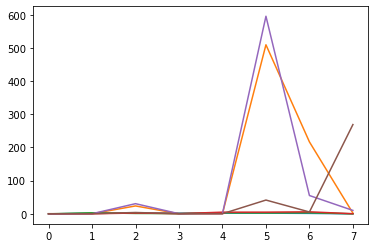

In [51]:
kmeans = KMeans()
kmeans.fit(whiteStd)
print(kmeans.cluster_centers_)
plt.plot(kmeans.cluster_centers_)

In [60]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(dirtyTemp, dirtyTemp.index)





RandomForestClassifier(max_depth=2, random_state=0)

In [63]:
prediction = clf.predict(whiteTemp)

(array([1383520.,       0.,       0.,  609144.,       0.,       0.,
         819256.,       0.,       0.,   63364.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

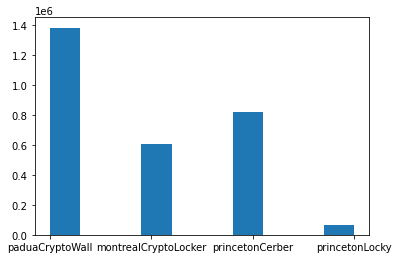

In [64]:
plt.hist(prediction)

(array([1383520.,       0.,       0.,  609144.,       0.,       0.,
         819256.,       0.,       0.,   63364.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

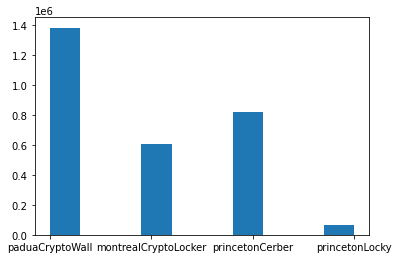

In [66]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
mixedTemp = dirtyTemp
mixedTemp.append(whiteTemp.iloc[:,:50000])
clf.fit(mixedTemp, mixedTemp.index)
prediction = clf.predict(whiteTemp)
plt.hist(prediction)
